In [138]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [139]:
#Read in dataset, include NA values (unwanted characters) 
spotify_data = pd.read_csv("Final_database.csv", na_values=['n', 'n ', 'n-a','#', 'n', ' '], low_memory = False)
spotify_data.head()

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,...,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,10,1.0,1.0,global
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,1,191,0.0,0.0,english speaking and nordic
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,1,1.0,1.0,spanish speaking
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,126,0.0,0.0,english speaking and nordic
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,1,0,0,0,0,21,0.0,1.0,english speaking and nordic


In [140]:
#Identify unwanted characters in specific columns 
for x in spotify_data["tempo"]:
    if isinstance(x,str) is True:
        try:
            x = float(x)
        except:
            print(x)

In [141]:
#Delete rows with NA values, convert object columns from object to float
spotify_clean = spotify_data[["Country", "Uri", "Popularity", "Title", "Artist", "Album/Single", "Genre", "Artist_followers", "Explicit", "Album", "Release_date", "Track_number", "Tracks_in_album", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acoustics", "instrumentalness", "valence" ,"tempo", "duration_ms", "time_signature", "Genre_new", "Days_since_release", "Released_after_2017"]]
spotify_clean.dropna()
spotify_clean.info(verbose = True, memory_usage = True, show_counts = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170633 entries, 0 to 170632
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Country              170633 non-null  object 
 1   Uri                  170628 non-null  object 
 2   Popularity           170633 non-null  float64
 3   Title                170627 non-null  object 
 4   Artist               170628 non-null  object 
 5   Album/Single         170628 non-null  object 
 6   Genre                166681 non-null  object 
 7   Artist_followers     170587 non-null  float64
 8   Explicit             170628 non-null  object 
 9   Album                170628 non-null  object 
 10  Release_date         170628 non-null  object 
 11  Track_number         170628 non-null  float64
 12  Tracks_in_album      170628 non-null  float64
 13  danceability         170614 non-null  float64
 14  energy               170614 non-null  float64
 15  key              

In [142]:
#Remove additional rows with blank (null) values
for x in spotify_clean.columns:
    spotify_clean = spotify_clean[spotify_clean[x].notna()]
spotify_clean.info(verbose=True, memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163528 entries, 0 to 170632
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Country              163528 non-null  object 
 1   Uri                  163528 non-null  object 
 2   Popularity           163528 non-null  float64
 3   Title                163528 non-null  object 
 4   Artist               163528 non-null  object 
 5   Album/Single         163528 non-null  object 
 6   Genre                163528 non-null  object 
 7   Artist_followers     163528 non-null  float64
 8   Explicit             163528 non-null  object 
 9   Album                163528 non-null  object 
 10  Release_date         163528 non-null  object 
 11  Track_number         163528 non-null  float64
 12  Tracks_in_album      163528 non-null  float64
 13  danceability         163528 non-null  float64
 14  energy               163528 non-null  float64
 15  key              

In [143]:
#Export CSV 
spotify_clean.to_csv("spotify_super_clean.csv")

In [144]:
#Rename Album/Single column
spotify_clean.rename(columns = {'Album/Single':'album_single'}, inplace = True)
spotify_clean.head()

,Country,Uri,Popularity,Title,Artist,album_single,Genre,Artist_followers,Explicit,Album,...,speechiness,acoustics,instrumentalness,valence,tempo,duration_ms,time_signature,Genre_new,Days_since_release,Released_after_2017
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0.336,0.323,0.0,0.72,171.993,258639.0,4.0,hip hop,740.0,1.0
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0.336,0.323,0.0,0.72,171.993,258639.0,4.0,hip hop,740.0,1.0
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0.336,0.323,0.0,0.72,171.993,258639.0,4.0,hip hop,740.0,1.0
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0.336,0.323,0.0,0.72,171.993,258639.0,4.0,hip hop,740.0,1.0
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0.336,0.323,0.0,0.72,171.993,258639.0,4.0,hip hop,740.0,1.0


In [145]:
#Identify all data within Explicit column
spotify_clean.Explicit.unique()

array([False, True], dtype=object)

In [146]:
#View DataFrame 
spotify_clean

,Country,Uri,Popularity,Title,Artist,album_single,Genre,Artist_followers,Explicit,Album,...,speechiness,acoustics,instrumentalness,valence,tempo,duration_ms,time_signature,Genre_new,Days_since_release,Released_after_2017
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0.3360,0.3230,0.000000,0.720,171.993,258639.0,4.0,hip hop,740.0,1.0
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0.3360,0.3230,0.000000,0.720,171.993,258639.0,4.0,hip hop,740.0,1.0
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0.3360,0.3230,0.000000,0.720,171.993,258639.0,4.0,hip hop,740.0,1.0
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0.3360,0.3230,0.000000,0.720,171.993,258639.0,4.0,hip hop,740.0,1.0
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0.3360,0.3230,0.000000,0.720,171.993,258639.0,4.0,hip hop,740.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170627,Taiwan,https://open.spotify.com/track/6QRRl9Yr0k88RlO...,123.20,不好說,HAOR,single,taiwan pop,2014.0,False,不好說,...,0.0531,0.4140,0.000000,0.569,92.053,198633.0,4.0,pop,872.0,1.0
170628,Taiwan,https://open.spotify.com/track/4v29A51TqtD2KFS...,31.20,smalltown,Luke Christopher,single,indie pop rap,152740.0,True,SmallTown,...,0.1000,0.1480,0.000000,0.526,79.974,140825.0,4.0,pop,1226.0,1.0
170629,Taiwan,https://open.spotify.com/track/7InvbALrXpsz58J...,156.00,灰狼,G.E.M.,album,mandopop,1225408.0,False,摩天動物園,...,0.1480,0.0952,0.000539,0.316,133.951,203418.0,4.0,pop,324.0,1.0
170631,Taiwan,https://open.spotify.com/track/0525Cll5exsrybt...,21.60,清晨巴士,Crowd Lu,album,chinese indie,149875.0,False,有吉他的流行歌曲,...,0.0350,0.8390,0.000000,0.417,66.537,264480.0,4.0,indie,2907.0,0.0


In [148]:
#View data types for all columns
spotify_clean.dtypes

Country                 object
Uri                     object
Popularity             float64
Title                   object
Artist                  object
album_single            object
Genre                   object
Artist_followers       float64
Explicit                object
Album                   object
Release_date            object
Track_number           float64
Tracks_in_album        float64
danceability           float64
energy                 float64
key                    float64
loudness               float64
mode                   float64
speechiness            float64
acoustics              float64
instrumentalness       float64
valence                float64
tempo                  float64
duration_ms            float64
time_signature         float64
Genre_new               object
Days_since_release     float64
Released_after_2017    float64
dtype: object

In [149]:
#View description of data 
spotify_clean.describe()

,Popularity,Artist_followers,Track_number,Tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,valence,tempo,duration_ms,time_signature,Days_since_release,Released_after_2017
count,163528.000000,1.635280e+05,163528.000000,163528.000000,163528.000000,163528.000000,163528.000000,163528.000000,163528.000000,163528.000000,163528.000000,163528.000000,163528.000000,163528.000000,1.635280e+05,163528.000000,163528.000000,163528.000000
mean,5569.460633,8.744267e+06,4.193967,9.280741,0.668985,0.643791,5.272706,-6.493641,0.562069,0.125160,0.238773,0.013767,0.490220,121.055024,2.067501e+05,3.963529,1330.358067,0.847439
std,13293.357129,1.305853e+07,4.620001,8.991030,0.143946,0.170520,3.643036,2.567029,0.496134,0.117088,0.245292,0.084597,0.221032,28.809595,5.007428e+04,0.310232,2438.480185,0.359565
min,0.800000,1.500000e+01,1.000000,1.000000,0.000000,0.005430,0.000000,-36.443000,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,3.013300e+04,0.000000,9.000000,0.000000
25%,80.000000,4.573380e+05,1.000000,1.000000,0.580000,0.540000,2.000000,-7.644000,0.000000,0.043200,0.045200,0.000000,0.321000,98.008000,1.792015e+05,4.000000,428.000000,1.000000
50%,545.125000,2.986089e+06,2.000000,10.000000,0.685000,0.662000,5.000000,-6.100000,1.000000,0.073200,0.149000,0.000000,0.485000,119.951000,2.025000e+05,4.000000,828.000000,1.000000
75%,4079.562500,1.262215e+07,6.000000,15.000000,0.773000,0.770000,8.000000,-4.814000,1.000000,0.171000,0.362000,0.000037,0.659000,140.018000,2.281390e+05,4.000000,1233.000000,1.000000
max,233766.900000,7.178310e+07,93.000000,481.000000,0.983000,0.999000,11.000000,1.634000,1.000000,0.955000,0.995000,0.987000,0.987000,230.270000,3.653957e+06,5.000000,44128.000000,1.000000


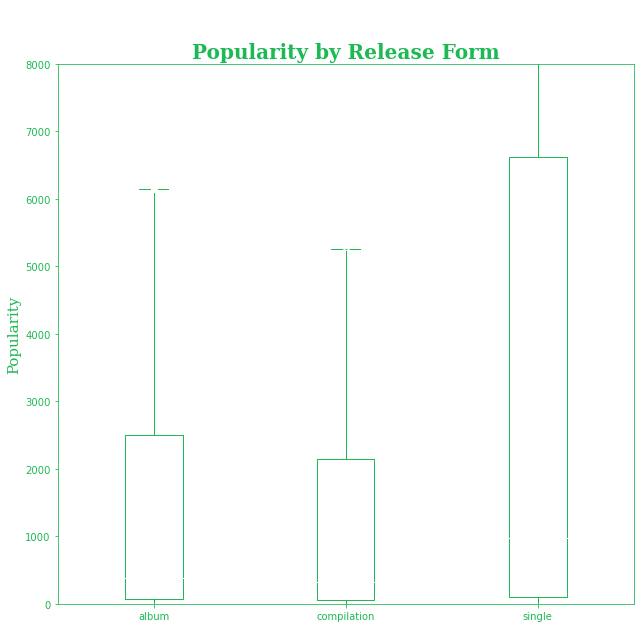

In [150]:
#Create boxplot for Popularity by Release Form 
color_dict =  {'patch_artist': False,
             'boxprops': dict(color= "#1DB954"),
             'capprops': dict(color="#1DB954"),
             'flierprops': dict(color="white", markeredgecolor="white"),
             'medianprops': dict(color="white"),
             'whiskerprops': dict(color="#1DB954")}

spotify_clean.boxplot("Popularity", by="album_single", figsize = (10, 10), **color_dict)
plt.ylim(0, 8000)

font1 = {'family':'serif','color':'#1DB954','size':20, 'weight': 'bold'}
font2 = {'family':'serif','color':'#1DB954','size':15}

plt.title("Popularity by Release Form", **font1)
plt.xlabel(' ')
plt.ylabel("Popularity", **font2)
plt.rc("axes", edgecolor="#1DB954")
plt.tick_params(axis='x', colors="#1DB954")
plt.tick_params(axis='y', colors="#1DB954")
plt.grid(False)
plt.suptitle(' ')

plt.savefig('popbyrelease.png', transparent=True, dpi=500)

In [151]:
#Recode values for album_single column to integers
spotify_clean['album_single'].replace(['single', 'album', 'compilation'],
                        [0, 1, 2], inplace=True)
spotify_clean.head()

,Country,Uri,Popularity,Title,Artist,album_single,Genre,Artist_followers,Explicit,Album,...,speechiness,acoustics,instrumentalness,valence,tempo,duration_ms,time_signature,Genre_new,Days_since_release,Released_after_2017
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,0,argentine hip hop,11427104.0,False,Adan y Eva,...,0.336,0.323,0.0,0.72,171.993,258639.0,4.0,hip hop,740.0,1.0
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,0,argentine hip hop,11427104.0,False,Adan y Eva,...,0.336,0.323,0.0,0.72,171.993,258639.0,4.0,hip hop,740.0,1.0
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,0,argentine hip hop,11427104.0,False,Adan y Eva,...,0.336,0.323,0.0,0.72,171.993,258639.0,4.0,hip hop,740.0,1.0
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,0,argentine hip hop,11427104.0,False,Adan y Eva,...,0.336,0.323,0.0,0.72,171.993,258639.0,4.0,hip hop,740.0,1.0
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,0,argentine hip hop,11427104.0,False,Adan y Eva,...,0.336,0.323,0.0,0.72,171.993,258639.0,4.0,hip hop,740.0,1.0


In [152]:
#Group data for ANOVA
group0 = spotify_clean[spotify_clean["album_single"] == 0]["Popularity"]
group1 = spotify_clean[spotify_clean["album_single"] == 1]["Popularity"]
group2 = spotify_clean[spotify_clean["album_single"] == 2]["Popularity"]

In [124]:
#Run ANOVA
st.f_oneway(group0, group1, group2)

F_onewayResult(statistic=508.7105445784787, pvalue=5.679009354870907e-221)

In [125]:
#Independent T-Test between single and album 
st.ttest_ind(group0, group1, equal_var=False)

Ttest_indResult(statistic=30.709196354255276, pvalue=1.9191160475259224e-206)

In [126]:
#Independent T-Test between album and compilation
st.ttest_ind(group1, group2, equal_var=False)

Ttest_indResult(statistic=5.940867491070312, pvalue=3.27551561960341e-09)

In [127]:
#Independent T-Test between single and compilation
st.ttest_ind(group0, group2, equal_var=False)

Ttest_indResult(statistic=15.748193262058752, pvalue=3.439076560296851e-53)

In [155]:
#Calculating median popularity for songs released as singles
spotify_clean[spotify_clean["album_single"] == 0]["Popularity"].median()

980.6500000000001

In [156]:
#Calculating median popularity for songs released as albums
spotify_clean[spotify_clean["album_single"] == 1]["Popularity"].median()

388.80000000000007

In [157]:
#Calculating median popularity for songs released as compilations
spotify_clean[spotify_clean["album_single"] == 2]["Popularity"].median()

320.99999999999994

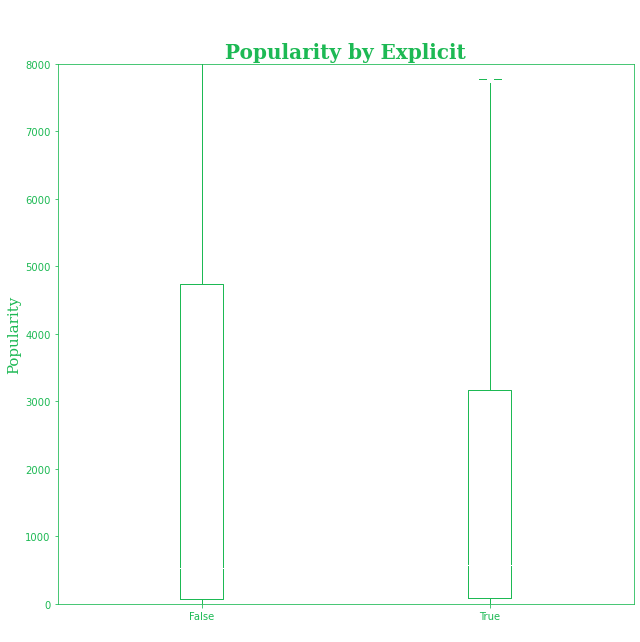

In [129]:
#Create boxplot for Popularity by Explicit 
color_dict =  {'patch_artist': False,
             'boxprops': dict(color= "#1DB954"),
             'capprops': dict(color="#1DB954"),
             'flierprops': dict(color="white", markeredgecolor="white"),
             'medianprops': dict(color="white"),
             'whiskerprops': dict(color="#1DB954")}

spotify_clean.boxplot("Popularity", by="Explicit", figsize = (10, 10), **color_dict)
plt.ylim(0, 8000)

font1 = {'family':'serif','color':'#1DB954','size':20, 'weight': 'bold'}
font2 = {'family':'serif','color':'#1DB954','size':15}

plt.title("Popularity by Explicit", **font1)
plt.ylabel("Popularity", **font2)
plt.xlabel(' ')
plt.rc("axes", edgecolor="#1DB954")
plt.tick_params(axis='x', colors="#1DB954")
plt.tick_params(axis='y', colors="#1DB954")
plt.grid(False)
plt.suptitle(' ')

plt.savefig('popbyexplicit.png', transparent=True, dpi=500)

In [130]:
#Recode values for Explicit column to integers
spotify_clean['Explicit'].replace([False, True],
                        [0, 1], inplace=True)
spotify_clean.head()

,Country,Uri,Popularity,Title,Artist,album_single,Genre,Artist_followers,Explicit,Album,...,speechiness,acoustics,instrumentalness,valence,tempo,duration_ms,time_signature,Genre_new,Days_since_release,Released_after_2017
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,0,argentine hip hop,11427104.0,0,Adan y Eva,...,0.336,0.323,0.0,0.72,171.993,258639.0,4.0,hip hop,740.0,1.0
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,0,argentine hip hop,11427104.0,0,Adan y Eva,...,0.336,0.323,0.0,0.72,171.993,258639.0,4.0,hip hop,740.0,1.0
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,0,argentine hip hop,11427104.0,0,Adan y Eva,...,0.336,0.323,0.0,0.72,171.993,258639.0,4.0,hip hop,740.0,1.0
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,0,argentine hip hop,11427104.0,0,Adan y Eva,...,0.336,0.323,0.0,0.72,171.993,258639.0,4.0,hip hop,740.0,1.0
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,0,argentine hip hop,11427104.0,0,Adan y Eva,...,0.336,0.323,0.0,0.72,171.993,258639.0,4.0,hip hop,740.0,1.0


In [131]:
#Group data for Independent T-Test
group0 = spotify_clean[spotify_clean["Explicit"] == 0]["Popularity"]
group1 = spotify_clean[spotify_clean["Explicit"] == 1]["Popularity"]

In [132]:
#Independent T-Test
st.ttest_ind(group0, group1, equal_var=False)

Ttest_indResult(statistic=27.09376677651873, pvalue=2.8362532604180604e-161)

In [153]:
#Calculating median popularity for song that are not explicit
spotify_clean[spotify_clean["Explicit"] == 0]["Popularity"].median()

528.0

In [154]:
#Calculating median popularity for songs that are explicit
spotify_clean[spotify_clean["Explicit"] == 1]["Popularity"].median()

572.0